### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clients.csv')

In [3]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [4]:
df.tail(10)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
185,2001,2,2004,3,Apartment,1,587.28,"$ 169,158.29",Sold,C0121,...,NaN,NaN,NaN,NaN,USA,California,Home,3,Yes,Website
186,1013,1,2005,7,Apartment,13,756.21,"$ 206,958.71",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
187,1014,1,2005,7,Apartment,14,743.09,"$ 206,445.42",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
188,1019,1,2005,7,Apartment,19,827.87,"$ 239,341.58",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
189,1020,1,2005,7,Apartment,20,1160.36,"$ 398,903.42",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
190,1022,1,2005,7,Apartment,22,743.09,"$ 210,745.17",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
191,1028,1,2005,7,Apartment,28,1160.36,"$ 331,154.88",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
192,1034,1,2005,7,Apartment,34,625.80,"$ 204,434.68",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
193,1037,1,2005,7,Apartment,37,756.21,"$ 189,194.31",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
194,1042,1,2005,7,Apartment,42,625.80,"$ 204,027.09",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website


In [5]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,195.0,NaN,NaN,NaN,2591.425641,1244.617996,1002.0,2003.5,2054.0,3048.5,5051.0
Building,195.0,NaN,NaN,NaN,2.564103,1.243434,1.0,2.0,2.0,3.0,5.0
Year of sale,195.0,NaN,NaN,NaN,2006.333333,1.072941,2004.0,2006.0,2007.0,2007.0,2010.0
Month of sale,195.0,NaN,NaN,NaN,7.271795,3.378674,1.0,4.0,8.0,10.0,12.0
Type of property,195,2,Apartment,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property number,195.0,NaN,NaN,NaN,27.328205,14.830832,1.0,15.0,27.0,39.0,59.0
Area (ft.),195.0,NaN,NaN,NaN,899.867128,261.48955,410.71,739.86,785.48,1075.46,1942.5
Price,195,194,"$ 460,001.26",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,195,1,Sold,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,195,162,C0174,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

ID                           int64
Building                     int64
Year of sale                 int64
Month of sale                int64
Type of property            object
Property number              int64
Area (ft.)                 float64
Price                       object
Status                      object
Customer ID                 object
Entity                      object
Name                        object
Surname                     object
Age at time of purchase    float64
Age Interval                object
Y                          float64
M                          float64
D                          float64
Gender                      object
Country                     object
State                       object
Purpose                     object
Deal satisfaction            int64
Mortgage                    object
Source                      object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [9]:
df.drop_duplicates()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1022,1,2005,7,Apartment,22,743.09,"$ 210,745.17",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
191,1028,1,2005,7,Apartment,28,1160.36,"$ 331,154.88",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
192,1034,1,2005,7,Apartment,34,625.80,"$ 204,434.68",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
193,1037,1,2005,7,Apartment,37,756.21,"$ 189,194.31",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website


In [10]:
df.nunique()

ID                         194
Building                     5
Year of sale                 6
Month of sale               12
Type of property             2
Property number             58
Area (ft.)                  75
Price                      194
Status                       1
Customer ID                162
Entity                       2
Name                       159
Surname                    156
Age at time of purchase     46
Age Interval                 6
Y                           50
M                           13
D                           31
Gender                       2
Country                      9
State                        9
Purpose                      2
Deal satisfaction            5
Mortgage                     2
Source                       3
dtype: int64

In [11]:
df['M'] = df['M'].apply(lambda x: x - 12 if x > 12 else x)

In [12]:
import missingno as msno

In [13]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['Age at time of purchase', 'Age Interval ', 'Y', 'M', 'D', 'Gender', 'State']

<Axes: >

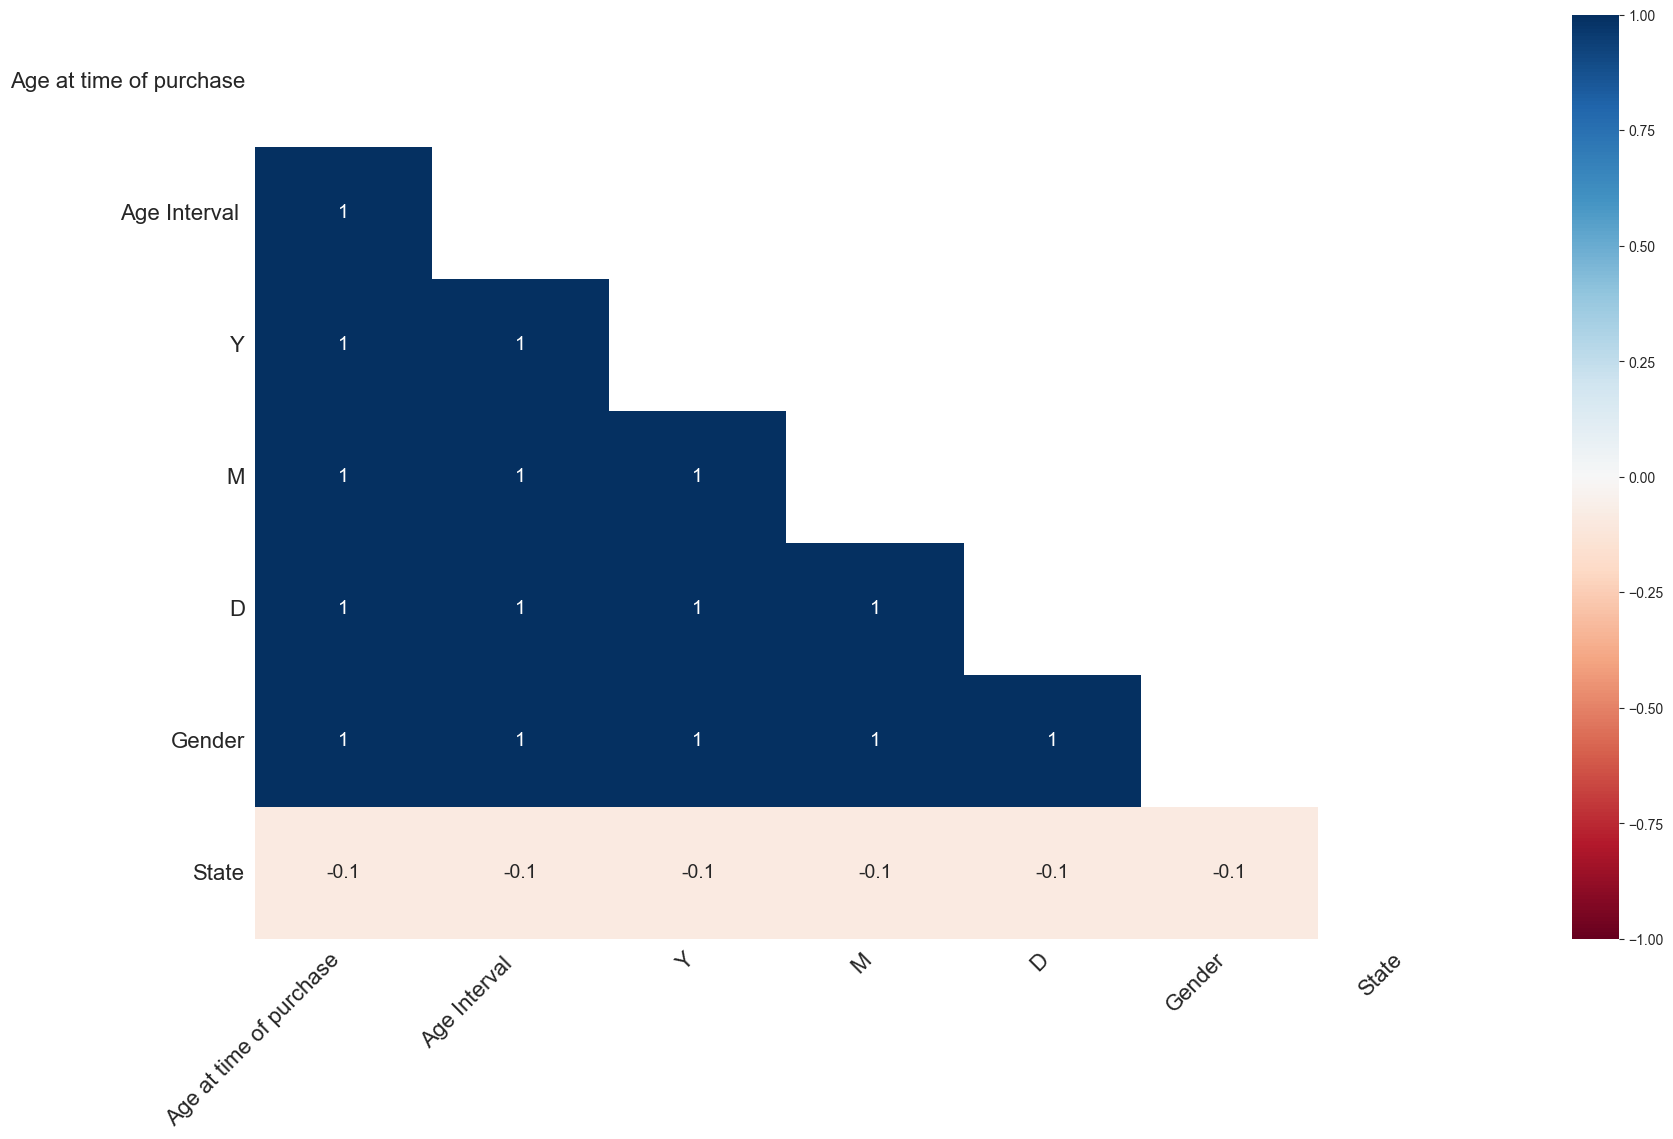

In [14]:
msno.heatmap(df, labels = True)

In [15]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [16]:
missing_percent = get_numerical_summary(df)

Age at time of purchase : 17 (8.718%)
Age Interval  : 17 (8.718%)
Y : 17 (8.718%)
M : 17 (8.718%)
D : 17 (8.718%)
Gender : 17 (8.718%)
State : 14 (7.179%)


In [17]:
df.nunique()

ID                         194
Building                     5
Year of sale                 6
Month of sale               12
Type of property             2
Property number             58
Area (ft.)                  75
Price                      194
Status                       1
Customer ID                162
Entity                       2
Name                       159
Surname                    156
Age at time of purchase     46
Age Interval                 6
Y                           50
M                           12
D                           31
Gender                       2
Country                      9
State                        9
Purpose                      2
Deal satisfaction            5
Mortgage                     2
Source                       3
dtype: int64

In [18]:
df[missing_columns].dtypes

Age at time of purchase    float64
Age Interval                object
Y                          float64
M                          float64
D                          float64
Gender                      object
State                       object
dtype: object

In [19]:
df['Year of sale'] = pd.to_datetime({'Year':df['Year of sale'],'Month':df['Month of sale'],'Day':1})
df.drop(columns='Month of sale', inplace=True)

In [20]:
df['Birth Date'] = pd.to_datetime({'Year': df['Y'], 'Month':df['M'], 'Day':df['D']})
df.drop(columns=['Y', 'M', 'D'], inplace=True)

In [21]:
df

,ID,Building,Year of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,...,Age at time of purchase,Age Interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Birth Date
0,1030,1,2005-11-01,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,...,19.0,18-25,F,USA,California,Home,5,No,Website,1986-06-21
1,1029,1,2005-10-01,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,...,22.0,18-25,F,USA,California,Home,5,No,Website,1983-02-24
2,2002,2,2007-07-01,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,...,22.0,18-25,M,USA,California,Home,1,Yes,Client,1985-12-27
3,2031,2,2007-12-01,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,...,22.0,18-25,M,USA,California,Investment,3,Yes,Website,1985-12-27
4,1049,1,2004-11-01,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,...,25.0,18-25,F,USA,California,Home,4,No,Agency,1979-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1022,1,2005-07-01,Apartment,22,743.09,"$ 210,745.17",Sold,C0174,Firm,...,NaN,NaN,NaN,USA,California,Investment,5,No,Website,NaT
191,1028,1,2005-07-01,Apartment,28,1160.36,"$ 331,154.88",Sold,C0174,Firm,...,NaN,NaN,NaN,USA,California,Investment,5,No,Website,NaT
192,1034,1,2005-07-01,Apartment,34,625.80,"$ 204,434.68",Sold,C0174,Firm,...,NaN,NaN,NaN,USA,California,Investment,5,No,Website,NaT
193,1037,1,2005-07-01,Apartment,37,756.21,"$ 189,194.31",Sold,C0174,Firm,...,NaN,NaN,NaN,USA,California,Investment,5,No,Website,NaT


In [22]:
df.iloc[178]

ID                                        1005
Building                                     1
Year of sale               2004-03-01 00:00:00
Type of property                        Office
Property number                              5
Area (ft.)                              410.71
Price                            $ 117,564.07 
Status                                   Sold 
Customer ID                              C0001
Entity                                    Firm
Name                                      Kamd
Surname                                     Co
Age at time of purchase                    NaN
Age Interval                               NaN
Gender                                     NaN
Country                                    USA
State                               California
Purpose                             Investment
Deal satisfaction                            5
Mortgage                                    No
Source                                  Agency
Birth Date   

In [23]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')

In [24]:
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval                0
Gender                      0
Country                     0
State                       0
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
Birth Date                 17
dtype: int64

In [25]:
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval                0
Gender                      0
Country                     0
State                       0
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
Birth Date                 17
dtype: int64

In [26]:
df['Price'] = df.Price.str.replace("$", "").str.replace(",", "").astype('float64')
df.rename(columns={'Price': 'Price $'}, inplace = True)

In [27]:
df.dtypes

ID                                  int64
Building                            int64
Year of sale               datetime64[ns]
Type of property                   object
Property number                     int64
Area (ft.)                        float64
Price $                           float64
Status                             object
Customer ID                        object
Entity                             object
Name                               object
Surname                            object
Age at time of purchase           float64
Age Interval                       object
Gender                             object
Country                            object
State                              object
Purpose                            object
Deal satisfaction                   int64
Mortgage                           object
Source                             object
Birth Date                 datetime64[ns]
dtype: object

In [28]:
df.drop(columns='Status', inplace=True)

In [29]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,195.0,NaN,NaN,NaN,2591.425641,1002.0,2003.5,2054.0,3048.5,5051.0,1244.617996
Building,195.0,NaN,NaN,NaN,2.564103,1.0,2.0,2.0,3.0,5.0,1.243434
Year of sale,195,NaN,NaN,NaN,2006-11-08 14:38:46.153846272,2004-03-01 00:00:00,2006-04-16 00:00:00,2007-03-01 00:00:00,2007-09-01 00:00:00,2010-05-01 00:00:00,NaN
Type of property,195,2,Apartment,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property number,195.0,NaN,NaN,NaN,27.328205,1.0,15.0,27.0,39.0,59.0,14.830832
Area (ft.),195.0,NaN,NaN,NaN,899.867128,410.71,739.86,785.48,1075.46,1942.5,261.48955
Price $,195.0,NaN,NaN,NaN,269434.560923,117564.07,212393.25,243052.59,308550.875,529317.28,80129.094465
Customer ID,195,162,C0174,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entity,195,2,Individual,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,195,159,Marleez,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 6,4
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

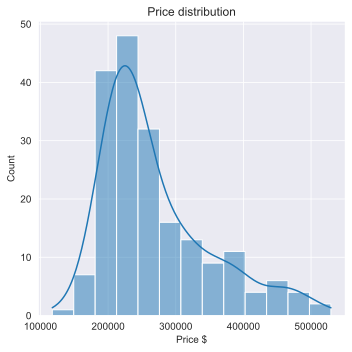

In [60]:
sns.displot(data=df,x='Price $',kde=True)
plt.title('Price distribution');

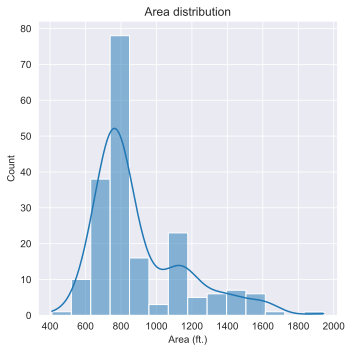

In [78]:
sns.displot(data=df,x='Area (ft.)',kde=True)
plt.title('Area distribution');

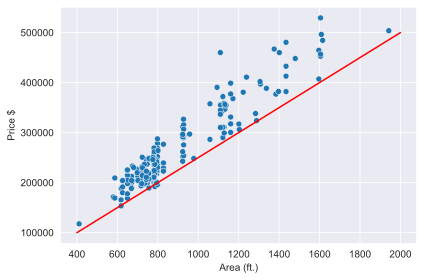

In [98]:
ax = sns.scatterplot(data=df, x='Area (ft.)', y ='Price $')
ax.plot([400, 2000], [100000, 500000], color='red')

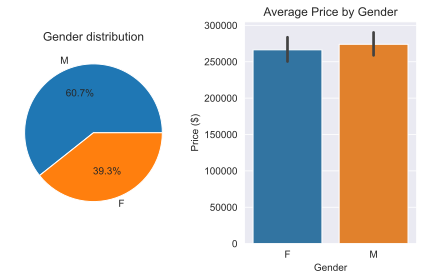

In [71]:
fig, ax = plt.subplots(1,2)
filtered_df = df[df['Gender'].isin(['M', 'F'])]
ax[0].pie(filtered_df['Gender'].value_counts(), labels = filtered_df['Gender'].value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Gender distribution');

sns.barplot(data=filtered_df, x='Gender', y='Price $', estimator=np.mean, ax=ax[1])
ax[1].set_title('Average Price by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Price $')

plt.tight_layout()

Text(0, 0.5, 'Price $')

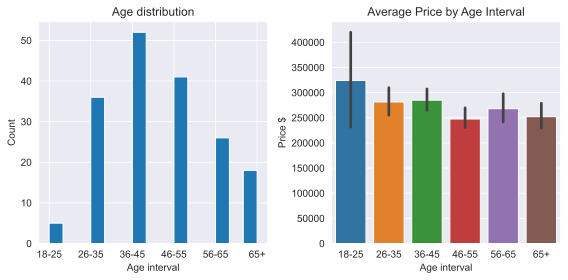

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

filtered_df = df[df['Age Interval '] != 'Missing']

filtered_df['Age Interval '].hist(bins='auto', edgecolor='white', ax=ax[0])
ax[0].set_title('Age distribution')
ax[0].set_xlabel('Age interval')
ax[0].set_ylabel('Count')

sns.barplot(data=filtered_df, x='Age Interval ', y='Price $', estimator=np.mean, ax=ax[1])
ax[1].set_title('Average Price by Age Interval')
ax[1].set_xlabel('Age interval')
ax[1].set_ylabel('Price $')


Text(0.5, 1.0, 'Type of property distribution')

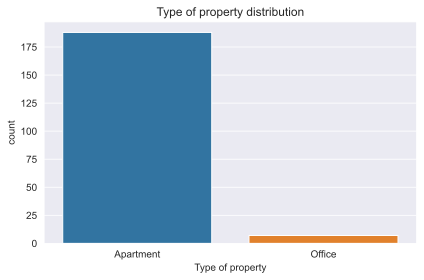

In [82]:
ax = sns.countplot(data= df, x = 'Type of property')
ax.set_title('Type of property distribution')

<Axes: xlabel='Entity', ylabel='Price $'>

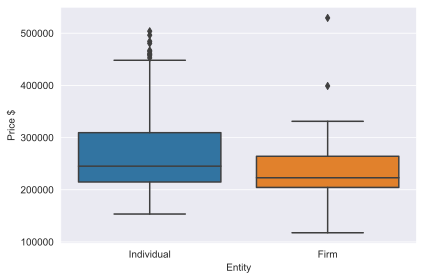

In [69]:
ax = sns.boxplot(data = df, x='Entity', y ='Price $')
ax.set_title('Price distribution by Entity')

Text(0.5, 1.0, 'Price distribution by source')

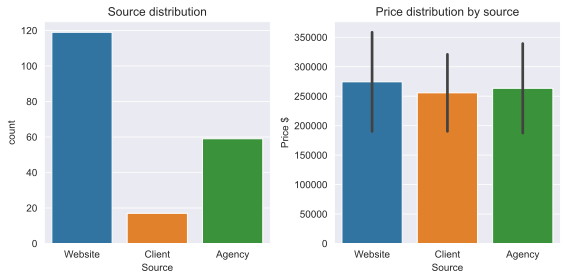

In [77]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

sns.countplot(data=df, x = 'Source', ax=ax[0]);
ax[0].set_title('Source distribution')

sns.barplot(data= df, x = 'Source', y = 'Price $', estimator=np.mean, errorbar = 'sd');
ax[1].set_title('Price distribution by source')

Text(0.5, 1.0, 'Price distribution by purpose')

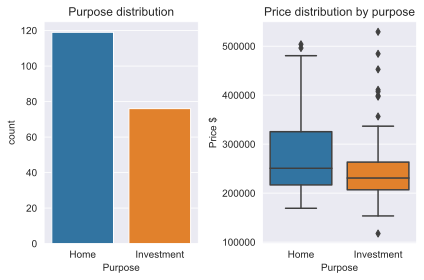

In [75]:
fig, axes = plt.subplots(1,2)

sns.countplot(data=df, x = 'Purpose', ax= axes[0])
axes[0].set_title('Purpose distribution')

sns.boxplot(data=df, x = 'Purpose', y = 'Price $', ax= axes[1])
axes[1].set_title('Price distribution by purpose')

In [38]:
df['Country'].value_counts().index

Index(['USA', 'USA ', 'Canada', 'Russia', 'UK', 'Belgium', 'Denmark',
       'Germany', 'Mexico'],
      dtype='object', name='Country')

In [86]:
df['Country'] = df.Country.str.replace("USA ", "USA")
df_country = df.copy()
df_country['Country'] = df['Country'].apply(lambda x: 'Other' if x != 'USA' else x)

Text(0.5, 1.0, 'Price distribution by country')

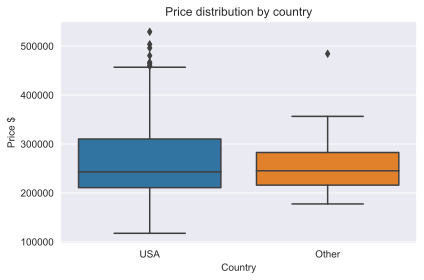

In [88]:
ax = sns.boxplot(data = df_country, x = 'Country', y ='Price $')
ax.set_title('Price distribution by country')

Text(0.5, 1.0, 'Price distribution by number of rooms')

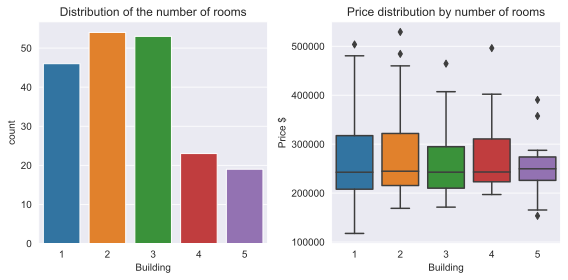

In [57]:
fig, axes = plt.subplots(1,2, figsize = (8,4))
plt.rcParams["figure.autolayout"] = True
fig.subplots_adjust(hspace=0.125, wspace=0.125)

sns.countplot(ax = axes[0], data = df, x ='Building')
axes[0].set_title('Distribution of the number of rooms')

sns.boxplot(ax = axes[1], data = df, x = 'Building', y = 'Price $')
axes[1].set_title('Price distribution by number of rooms')

Text(0.5, 1.0, 'Price distribution by type of sale')

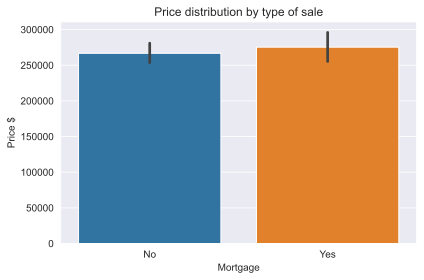

In [91]:
ax = sns.barplot(data=df, x = 'Mortgage', y = 'Price $', estimator=np.mean)
ax.set_title('Price distribution by type of sale')

**Вывод**
Целевой клиент - клиент, наиболее желательный для компании. В нашем случае портрет целевого клиента будет выглядеть как портрет клиента, приносящего наибольшее количество денег, то есть приобретающего наиболее дорогую недвижимость. Нашим целевым клиентом будет являться частное лицо, мужчина 36-45 лет (малое количество значений для 18-25 + большое ско), гражданин США, покупающий недвижимость для собственного проживания в ипотеку, предпочитающий двухкомнатный объект с большой жилой площадью, в качестве лида использует вебсайт.